In [2]:
import pandas as pd
#math operations
import numpy as np
#machine learning
import cv2
import os
from random import shuffle
from tqdm import tqdm
import random
#for opening and loading image
from PIL import Image
#for preprocessing
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
#Doing One hot encoding as classifier has multiple classes
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from random import shuffle
#For augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#MobileNetV2 model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Model, layers
from numpy import loadtxt

import itertools
from sklearn.metrics import confusion_matrix,classification_report

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# setting path of directory
B_DIR = "/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis"
M_DIR =  "/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma"
N_DIR = "/content/drive/MyDrive/Datasets/outputDir/Train/_nevus"


# storing all the files from directories PARA_DIR and NORM_DIR to Pimages and Nimages for accessing images directly
Bimages = os.listdir(B_DIR)
Mimages = os.listdir(M_DIR)
Nimages = os.listdir(N_DIR)

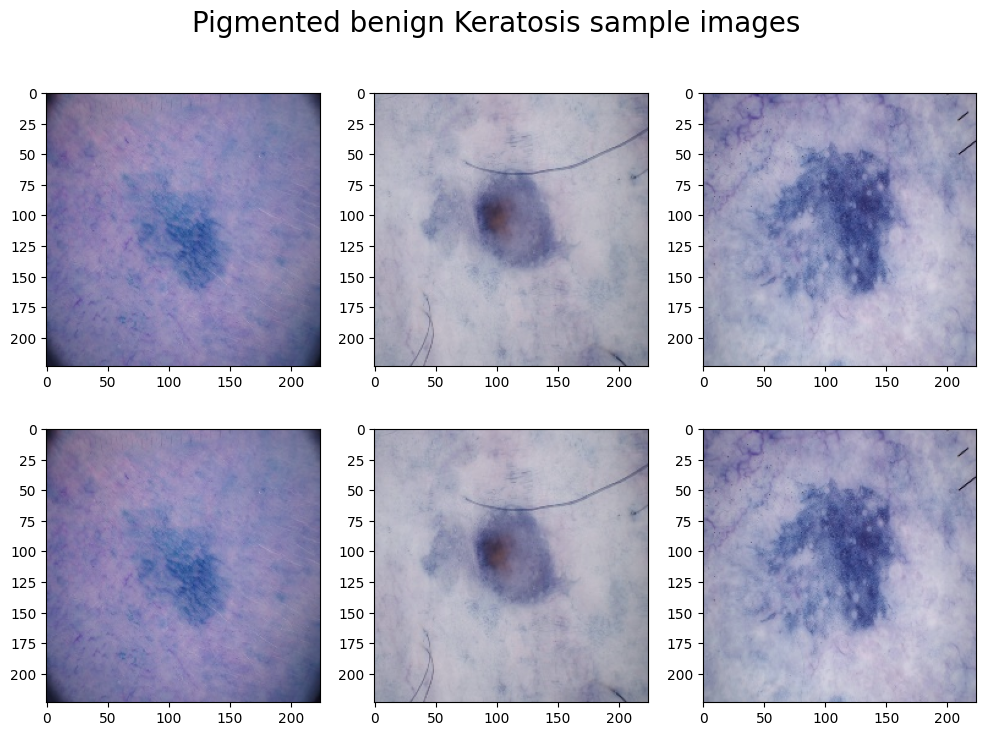

In [5]:
import cv2
import matplotlib.pyplot as plt

# Replace this with the actual path to your image directory
image_directory = "/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis"

sample_parasite = [
    "/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis/ISIC_0024435.jpg",
    "/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis/ISIC_0024445.jpg",
    "/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis/ISIC_0024453.jpg"

]
# Create a subplot for displaying images
f, ax = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6):
    im = cv2.imread(os.path.join(image_directory, sample_parasite[i-3]))
    ax[i//3, i%3].imshow(im)
    #ax[i//3, i%3].axis('off')

f.suptitle('Pigmented benign Keratosis sample images', fontsize=20)
plt.show()


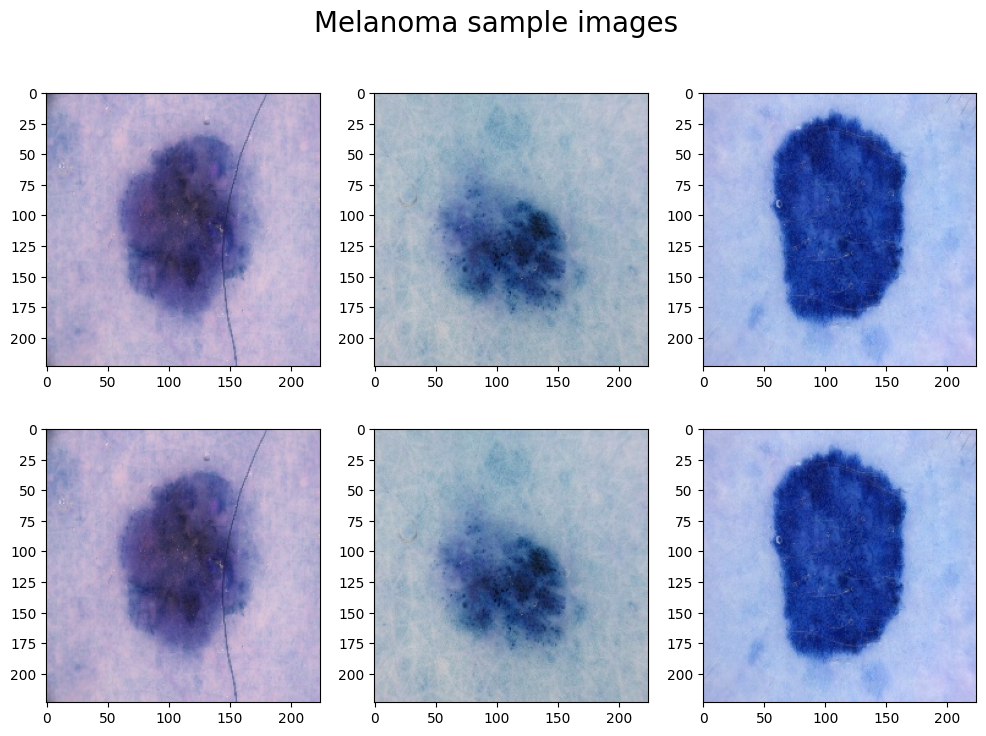

In [6]:
import cv2
import matplotlib.pyplot as plt

# Replace this with the actual path to your image directory
image_directory = "/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma"

sample_parasite = [
    "/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma/ISIC_0000139.jpg",
    "/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma/ISIC_0000143.jpg",
    "/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma/ISIC_0000145.jpg"
]

# Create a subplot for displaying images
f, ax = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6):
    im = cv2.imread(os.path.join(image_directory, sample_parasite[i-3]))
    ax[i//3, i%3].imshow(im)
    #ax[i//3, i%3].axis('off')

f.suptitle('Melanoma sample images', fontsize=20)
plt.show()

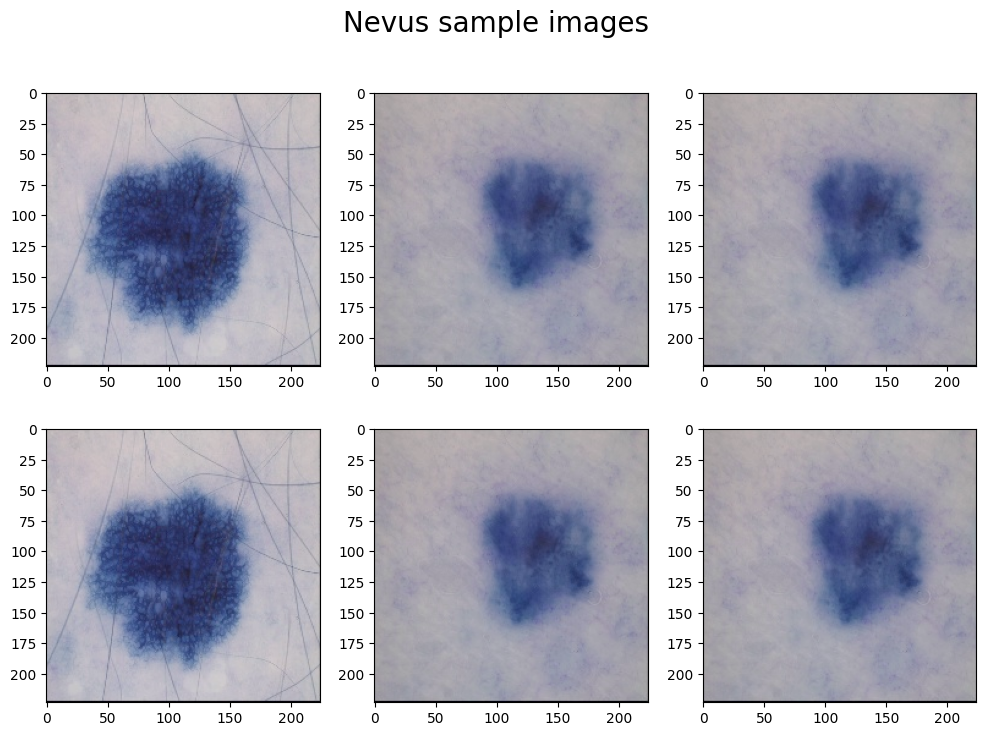

In [7]:
import cv2
import matplotlib.pyplot as plt

# Replace this with the actual path to your image directory
image_directory = "/content/drive/MyDrive/Datasets/outputDir/Train/_nevus"

sample_parasite = [
    "/content/drive/MyDrive/Datasets/outputDir/Train/_nevus/ISIC_0000019.jpg",
    "/content/drive/MyDrive/Datasets/outputDir/Train/_nevus/ISIC_0000023.jpg",
    "/content/drive/MyDrive/Datasets/outputDir/Train/_nevus/ISIC_0000023.jpg"
]

# Create a subplot for displaying images
f, ax = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6):
    im = cv2.imread(os.path.join(image_directory, sample_parasite[i-3]))
    ax[i//3, i%3].imshow(im)
    #ax[i//3, i%3].axis('off')

f.suptitle('Nevus sample images', fontsize=20)
plt.show()

#Data Preparation - Loading Images and Labels

In [8]:
import os
import cv2
from PIL import Image
import numpy as np

data = []
labels = []

# Define the base directory where the ISIC 2017 dataset is stored.
base_dir = "/content/drive/MyDrive/Datasets/outputDir/Train"

# Define the subdirectories for each class (e.g., pigmented benign keratosis, melanoma, nevus).
class_directories = ["_pigmented benign keratosis", "_melanoma", "_nevus"]

# Define labels for each class.
class_labels = [0, 1, 2]

for class_dir, label in zip(class_directories, class_labels):
    class_path = os.path.join(base_dir, class_dir)
    images = os.listdir(class_path)

    for image_name in images:
        image_path = os.path.join(class_path, image_name)
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image_from_array = Image.fromarray(image, 'RGB')
                size_image = image_from_array.resize((224, 224))
                data.append(np.array(size_image))
                labels.append(label)
            else:
                print(f"Image loading failed for: {image_path}")
        except Exception as e:
            print(f"Exception occurred: {str(e)}")

images


['ISIC_0000024.jpg',
 'ISIC_0000023.jpg',
 'ISIC_0000019.jpg',
 'ISIC_0000068.jpg',
 'ISIC_0000065.jpg',
 'ISIC_0000064.jpg',
 'ISIC_0000059.jpg',
 'ISIC_0000061.jpg',
 'ISIC_0000057.jpg',
 'ISIC_0000058.jpg',
 'ISIC_0000052.jpg',
 'ISIC_0000053.jpg',
 'ISIC_0000060.jpg',
 'ISIC_0000062.jpg',
 'ISIC_0000063.jpg',
 'ISIC_0000055.jpg',
 'ISIC_0000050.jpg',
 'ISIC_0000051.jpg',
 'ISIC_0000042.jpg',
 'ISIC_0000039.jpg',
 'ISIC_0000041.jpg',
 'ISIC_0000038.jpg',
 'ISIC_0000034.jpg',
 'ISIC_0000037.jpg',
 'ISIC_0000028.jpg',
 'ISIC_0000032.jpg',
 'ISIC_0000033.jpg',
 'ISIC_0000047.jpg',
 'ISIC_0000021.jpg',
 'ISIC_0000020.jpg',
 'ISIC_0000025.jpg',
 'ISIC_0000027.jpg',
 'ISIC_0000232.jpg',
 'ISIC_0000229.jpg',
 'ISIC_0000228.jpg',
 'ISIC_0000223.jpg',
 'ISIC_0000224.jpg',
 'ISIC_0000221.jpg',
 'ISIC_0000099.jpg',
 'ISIC_0000225.jpg',
 'ISIC_0000219.jpg',
 'ISIC_0000222.jpg',
 'ISIC_0000226.jpg',
 'ISIC_0000227.jpg',
 'ISIC_0000220.jpg',
 'ISIC_0000096.jpg',
 'ISIC_0000092.jpg',
 'ISIC_000009

In [14]:
data=[]
labels=[]
Basal=os.listdir("/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis")
for a in Basal:
    try:
        image=cv2.imread("/content/drive/MyDrive/Datasets/outputDir/Train/_pigmented benign keratosis"+a)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(0)
    except AttributeError:
        print("")

Melanoma=os.listdir("/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma")
for b in Melanoma:
    try:
        image=cv2.imread("/content/drive/MyDrive/Datasets/outputDir/Train/_melanoma"+b)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(1)
    except AttributeError:
        print("")
Nevus=os.listdir("/content/drive/MyDrive/Datasets/outputDir/Train/_nevus")
for c in Nevus:
    try:
        image=cv2.imread("/content/drive/MyDrive/Datasets/outputDir/Train/_nevus"+c)
        image_from_array = Image.fromarray(image, 'RGB')
        size_image = image_from_array.resize((224, 224))
        data.append(np.array(size_image))
        labels.append(2)
    except AttributeError:
        print("")


In [9]:
#converting features and labels in array
feats=np.array(data)
labels=np.array(labels)

# saving features and labels for later re-use
np.save("/content/drive/MyDrive/Datasets/outputDir/feats_train",feats)
np.save("/content/drive/MyDrive/Datasets/outputDir/labels_train",labels)

Loading saved data and labels

In [10]:
feats=np.load("/content/drive/MyDrive/Datasets/outputDir/feats_train.npy")
labels=np.load("/content/drive/MyDrive/Datasets/outputDir/labels_train.npy")

Randomizing Data and Labels

In [11]:
s=np.arange(feats.shape[0])
np.random.shuffle(s)
feats=feats[s]
labels=labels[s]

In [12]:
num_classes=len(np.unique(labels))
len_data=len(feats)
print(len_data)

1257


In [13]:
print(num_classes)

3


#Train Test split

In [14]:
# splitting cells images into 80:20 ratio i.e., 80% for training and 20% for testing purpose
(x_train,x_test)=feats[(int)(0.2*len_data):],feats[:(int)(0.2*len_data)]

(y_train,y_test)=labels[(int)(0.2*len_data):],labels[:(int)(0.2*len_data)]

Image Data Normalization

In [15]:
# Reshape the input data to have the batch size dimension
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

In [16]:
x_train = x_train.astype('float32')/255 # As we are working on image data we are normalizing data by dividing 255.
x_test = x_test.astype('float32')/255
train_len=len(x_train)
test_len=len(x_test)

In [17]:
y_train=to_categorical(y_train,3)
y_test=to_categorical(y_test,3)

#Image Augmentation

In [18]:
trainAug = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

In [19]:
trainAug  = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

#Model Building

In [20]:
from tensorflow.keras.applications import ResNet101

In [21]:
conv_base = ResNet101(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = True

In [22]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.1)(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [23]:
callbacks = [ModelCheckpoint('.mdl_wts.hdf5', monitor='val_loss',mode='min',verbose=1, save_best_only=True),
             ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1, mode='min', min_lr=0.00000000001)]

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
BS = 32
print("[INFO] training head...")
H = model.fit(
	trainAug.flow(x_train,y_train, batch_size=BS),
	steps_per_epoch=train_len // BS,
	validation_data=(x_test, y_test),
	validation_steps=test_len // BS,
	epochs=30,callbacks=callbacks)

[INFO] training head...
Epoch 1/30
31/31 [==============================] - ETA: 0s - loss: 1.0236 - accuracy: 0.5955
Epoch 1: val_loss improved from inf to 2352888320.00000, saving model to .mdl_wts.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 122s 1s/step - loss: 1.0236 - accuracy: 0.5955 - val_loss: 2352888320.0000 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 2/30
31/31 [==============================] - ETA: 0s - loss: 0.8585 - accuracy: 0.6391
Epoch 2: val_loss improved from 2352888320.00000 to 42324324.00000, saving model to .mdl_wts.hdf5
31/31 [==============================] - 27s 862ms/step - loss: 0.8585 - accuracy: 0.6391 - val_loss: 42324324.0000 - val_accuracy: 0.3546 - lr: 0.0010
Epoch 3/30
31/31 [==============================] - ETA: 0s - loss: 0.7453 - accuracy: 0.6930
Epoch 3: val_loss improved from 42324324.00000 to 261.13577, saving model to .mdl_wts.hdf5
31/31 [==============================] - 26s 843ms/step - loss: 0.7453 - accuracy: 0.6930 - val_loss: 261.1358 - val_accuracy: 0.2669 - lr: 0.0010
Epoch 4/30
31/31 [==============================] - ETA: 0s - loss: 0.7590 - accuracy: 0.7012
Epoch 4: val_loss improved from 261.13577 to 5.09376, saving model to .mdl_wts

In [26]:
model = load_model('.mdl_wts.hdf5')
model.save('/content/drive/My Drive/skin_model/model_v1.h5')


In [27]:
model = load_model('/content/drive/My Drive/skin_model/model_v1.h5')
# checking the accuracy
accuracy = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test_Accuracy:-', accuracy[1])

8/8 [==============================] - 5s 338ms/step - loss: 1.1312 - accuracy: 0.3785

 Test_Accuracy:- 0.3784860670566559


In [28]:
rounded_predictions = model.predict(x_test, batch_size=16, verbose=0)
rounded_predictions[1]

array([0.41727632, 0.22876292, 0.35396078], dtype=float32)

16/16 [==============================] - 1s 83ms/step


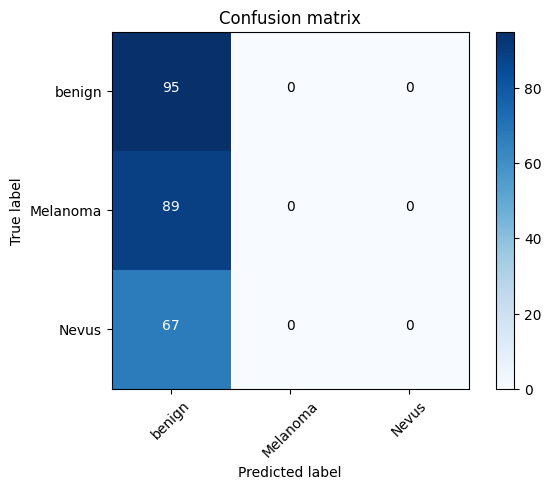

In [29]:
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_test, axis=1)

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
BS=16
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['benign','Melanoma','Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [30]:
predIdxs = model.predict(x_test, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
rounded_labels=np.argmax(y_test, axis=1)

# show a nicely formatted classification report
print(classification_report(rounded_labels, predIdxs,target_names=['Benign','Melanoma','Nevus']))

16/16 [==============================] - 1s 88ms/step
              precision    recall  f1-score   support

      Benign       0.38      1.00      0.55        95
    Melanoma       0.00      0.00      0.00        89
       Nevus       0.00      0.00      0.00        67

    accuracy                           0.38       251
   macro avg       0.13      0.33      0.18       251
weighted avg       0.14      0.38      0.21       251



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ROC CURVE

16/16 [==============================] - 1s 95ms/step


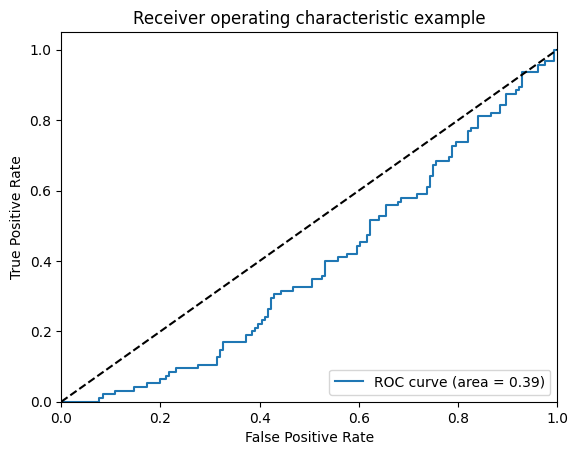

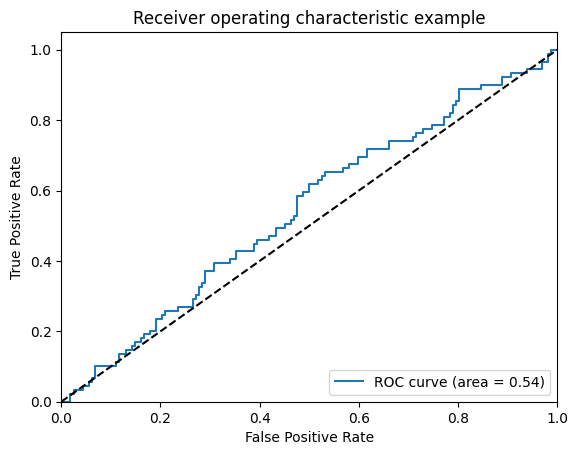

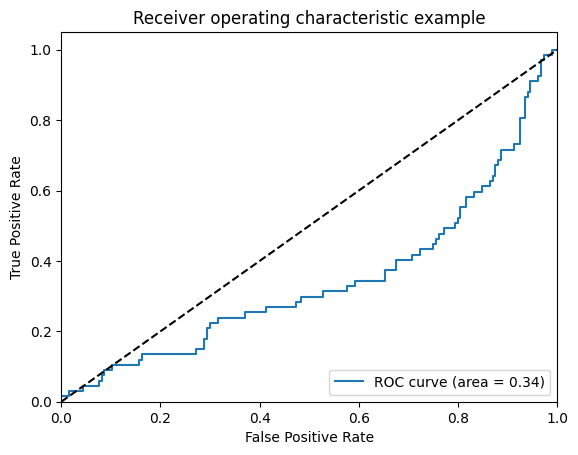

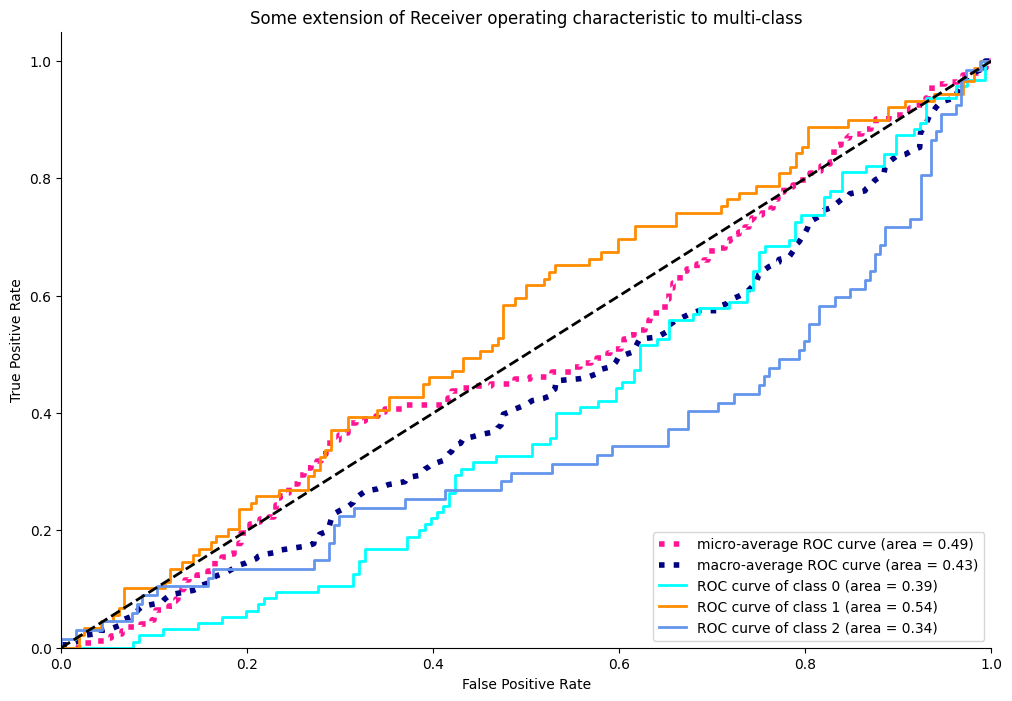

In [31]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_test = np.array(y_test)

n_classes = 3

pred_Y = model.predict(x_test, batch_size = 16, verbose = True)
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_Y[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred_Y.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig = plt.figure(figsize=(12, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
sns.despine()
plt.show()

#Preparing Test data

In [32]:
# Define the base directory where the ISIC 2017 dataset is stored.
base_dir = "/content/drive/MyDrive/Datasets/outputDir/Test"

# Define the subdirectories for each class (e.g., pigmented benign keratosis, melanoma, nevus).
class_directories = ["_pigmented benign keratosis", "_melanoma", "_nevus"]

# Define labels for each class.
class_labels = [0, 1, 2]

for class_dir, label in zip(class_directories, class_labels):
    class_path = os.path.join(base_dir, class_dir)
    images = os.listdir(class_path)

    for image_name in images:
        image_path = os.path.join(class_path, image_name)
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image_from_array = Image.fromarray(image, 'RGB')
                size_image = image_from_array.resize((224, 224))
                data.append(np.array(size_image))
                labels.append(label)
            else:
                print(f"Image loading failed for: {image_path}")
        except Exception as e:
            print(f"Exception occurred: {str(e)}")

print(images)

Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray' object has no attribute 'append'
Exception occurred: 'numpy.ndarray

In [33]:
feats_test=np.array(data)
labels_test=np.array(labels)

np.save("/content/drive/MyDrive/Datasets/outputDir/feats_test",feats_test)
np.save("/content/drive/MyDrive/Datasets/outputDir/labels_test",labels_test)

In [34]:
feats_test=np.load("/content/drive/MyDrive/Datasets/outputDir/feats_test.npy")
labels_test=np.load("/content/drive/MyDrive/Datasets/outputDir/labels_test.npy")

num_classes=len(np.unique(labels_test))
len_data=len(feats_test)
print(len_data)

1305


In [35]:
x_valid = feats_test.astype('float32')/255
y_valid=to_categorical(labels_test,3)

In [ ]:
pred_Y = model.predict(x_valid, batch_size = 10, verbose = True)
rounded_predictions = model.predict(x_valid, batch_size=16, verbose=0)
pred = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_valid, axis=1)
BS=10
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    target_names =['Benign','Melanoma','Nevus']

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_valid, batch_size=BS)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(pred_Y,axis=1)
# Convert validation observations to one hot vectors
# compute the confusion matrix
rounded_labels=np.argmax(y_valid, axis=1)
confusion_mtx = confusion_matrix(rounded_labels, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

131/131 [==============================] - 8s 62ms/step


In [36]:
model = load_model('/content/drive/My Drive/skin_model/model_v1.h5')

In [37]:
img1 = "/content/drive/MyDrive/Datasets/outputDir/Test/_nevus/ISIC_0000001.jpg"
img2 ="/content/drive/MyDrive/Datasets/outputDir/Test/_melanoma/ISIC_0000030.jpg"
img3 = "/content/drive/MyDrive/Datasets/outputDir/Test/_pigmented benign keratosis/ISIC_0024382.jpg"

In [38]:
class_dict ={0:"Pigmented Benign Keratosis (Cancer)",
             1:"Melanoma (Cancer)",
             2:"Nevus (Non-Cancerous)"}

In [42]:
from keras.preprocessing import image
import numpy as np
from PIL import Image

def pred_image(img_path, model, class_dict):
    img = Image.open(img_path).resize((224, 224))  # Ensure the target_size matches the model's input size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32') / 255

    preds = model.predict(img)[0]
    prediction = sorted(
        [(class_dict[i], round(j * 100, 2)) for i, j in enumerate(preds)],
        reverse=True,
        key=lambda x: x[1]
    )

    return prediction


In [40]:
from IPython.display import  display
def pred_image(img_path,model):
  img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!
  # Preprocessing the image
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img.astype('float32')/255

  preds = model.predict(img)
  pred = np.argmax(preds,axis = 1)
  pred_cat = [k for k, v in class_dict.items() if v == pred[0]][0]

  return pred_cat


In [44]:
pred_image(img1,model,class_dict)

1/1 [==============================] - 3s 3s/step


[('Pigmented Benign Keratosis (Cancer)', 42.35),
 ('Nevus (Non-Cancerous)', 35.11),
 ('Melanoma (Cancer)', 22.54)]

In [46]:
pred_image(img2,model,class_dict)

1/1 [==============================] - 0s 49ms/step


[('Pigmented Benign Keratosis (Cancer)', 42.29),
 ('Nevus (Non-Cancerous)', 35.11),
 ('Melanoma (Cancer)', 22.6)]

In [47]:
pred_image(img3,model,class_dict)

1/1 [==============================] - 0s 119ms/step


[('Pigmented Benign Keratosis (Cancer)', 41.21),
 ('Nevus (Non-Cancerous)', 35.48),
 ('Melanoma (Cancer)', 23.31)]

#Plotting sample predictions

8/8 [==============================] - 1s 169ms/step


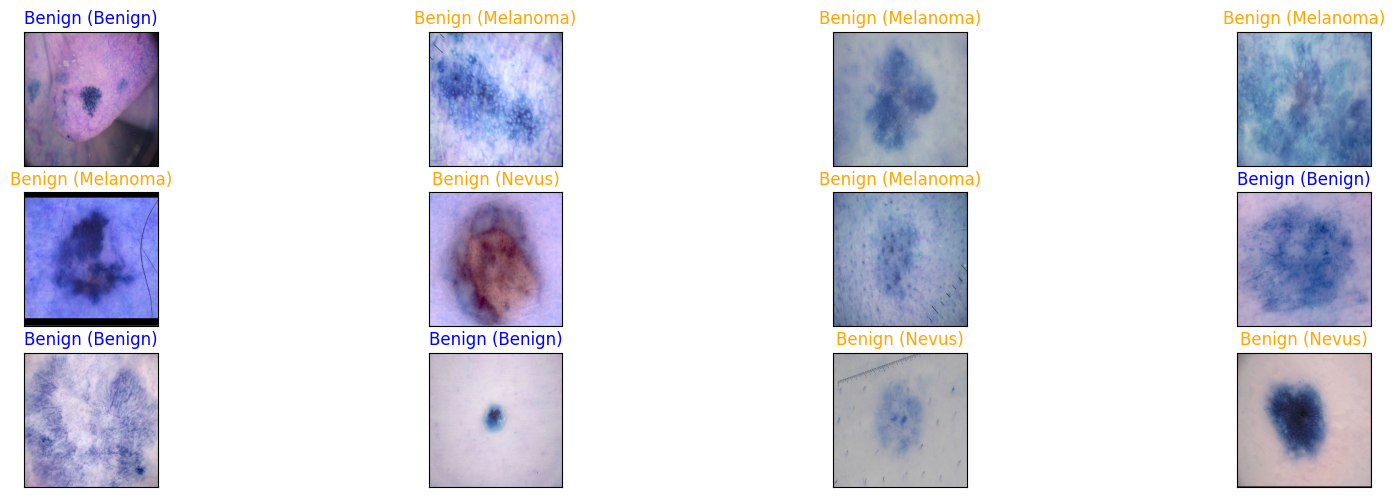

In [62]:
y_hat = model.predict(x_test)

# define text labels
skin_labels = ['Benign','Melanoma','Nevus']

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=12, replace=False)):
    ax = fig.add_subplot(4,4, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(skin_labels[pred_idx], skin_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "orange"))

In [63]:
!pip install tf-keras-vis

In [66]:
pip install Pillow


In [67]:
from PIL import Image

In [68]:
from tensorflow.keras.preprocessing import image
img_path='/content/drive/MyDrive/Datasets/outputDir/Test/_melanoma/ISIC_0000030.jpg'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [69]:
import tensorflow as tf
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [71]:
# Prepare image
img_size=(224,224)
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
img_path='/content/drive/MyDrive/Datasets/outputDir/Test/_melanoma/ISIC_0000030.jpg'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img)

1/1 [==============================] - 0s 122ms/step


#GRADCAM

In [56]:
layer_names=[layer.name for layer in model.layers]
layer_names

['input_1',
 'conv1_pad',
 'conv1_conv',
 'conv1_bn',
 'conv1_relu',
 'pool1_pad',
 'pool1_pool',
 'conv2_block1_1_conv',
 'conv2_block1_1_bn',
 'conv2_block1_1_relu',
 'conv2_block1_2_conv',
 'conv2_block1_2_bn',
 'conv2_block1_2_relu',
 'conv2_block1_0_conv',
 'conv2_block1_3_conv',
 'conv2_block1_0_bn',
 'conv2_block1_3_bn',
 'conv2_block1_add',
 'conv2_block1_out',
 'conv2_block2_1_conv',
 'conv2_block2_1_bn',
 'conv2_block2_1_relu',
 'conv2_block2_2_conv',
 'conv2_block2_2_bn',
 'conv2_block2_2_relu',
 'conv2_block2_3_conv',
 'conv2_block2_3_bn',
 'conv2_block2_add',
 'conv2_block2_out',
 'conv2_block3_1_conv',
 'conv2_block3_1_bn',
 'conv2_block3_1_relu',
 'conv2_block3_2_conv',
 'conv2_block3_2_bn',
 'conv2_block3_2_relu',
 'conv2_block3_3_conv',
 'conv2_block3_3_bn',
 'conv2_block3_add',
 'conv2_block3_out',
 'conv3_block1_1_conv',
 'conv3_block1_1_bn',
 'conv3_block1_1_relu',
 'conv3_block1_2_conv',
 'conv3_block1_2_bn',
 'conv3_block1_2_relu',
 'conv3_block1_0_conv',
 'conv3_

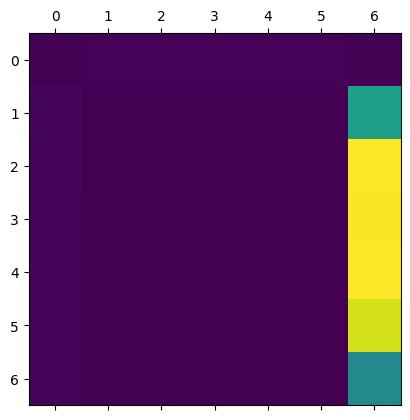

In [72]:
# Generate class activation heatmap
last_conv_layer_name = "conv5_block3_out"
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-74-d0de0494797a>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


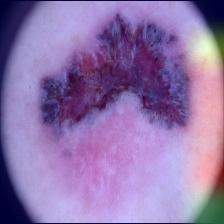

In [74]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image as im
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
img_path='/content/drive/MyDrive/Datasets/outputDir/Test/_melanoma/ISIC_0000030.jpg'
def save_and_display_gradcam(img_path, heatmap, cam_path="/content/drive/MyDrive/Datasets/outputDir/cam3.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)
    # img = im.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

    # # Preprocessing the image
    # img = im.img_to_array(img)
    # img = np.expand_dims(img, axis=0)
    # img = img.astype('float32')/255

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)